In [5]:
%matplotlib inline
from __future__ import division, print_function

import numpy as np
from numpy import diag
import numpy.random as rand
from numpy.linalg import norm, inv, eigvals

import sys
from IPython import display
from tqdm import tqdm
from ipyparallel import Client

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain, repeat
import pandas as pd

import models
from util import *
from viz import *
import networkx as nx
import time
from tqdm import trange

sns.set_context('paper', font_scale=1.7)
plt.rcParams['figure.figsize'] = (12.0, 5.0)

In [2]:
rand.seed(993894)
N = 1000
A = gnp(N, 0.005*N/N)
s = rand.rand(N)

op1 = models.hk(s, 0.15, 10e3)
op2 = models.hk_local(A, s, 0.15, 10e3)

  0%|          | 9/10000 [00:00<07:00, 23.77it/s]

G(N,p) Network Created: N = 1000, Mean Degree = 7.055
Hegselmann-Krause converged after 10 rounds

  8%|▊         | 760/10000 [00:29<05:47, 26.59it/s]


Hegselmann-Krause (Local Knowledge) converged after 762 rounds


In [3]:
def plot_opinions2(op, color):
    N = op.shape[1]
    for i in xrange(N):
        plt.plot(op[:, i], color, alpha=0.5, linewidth=0.7)

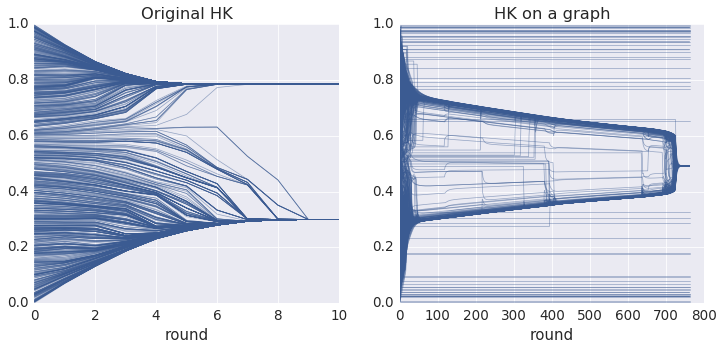

In [6]:
col = sns.xkcd_rgb['denim blue']
plt.subplot(1, 2, 1)
plt.title('Original HK')
plot_opinions2(op1, col)
plt.xlabel('round')

plt.subplot(1, 2, 2)
plt.title('HK on a graph')
plot_opinions2(op2, col)
plt.xlabel('round')

plt.show()

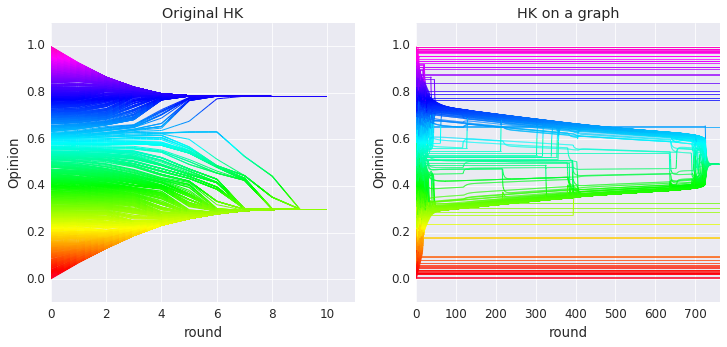

In [11]:
plt.subplot(1, 2, 1)
plot_opinions(op1, dcolor=True, title='Original HK', cmap=plt.cm.gist_rainbow)
plt.xlabel('round')

plt.subplot(1, 2, 2)
plot_opinions(op2, dcolor=True, title='HK on a graph', cmap=plt.cm.gist_rainbow)
plt.xlabel('round')


#sm = plt.cm.ScalarMappable(cmap=plt.cm.gist_rainbow, norm=plt.Normalize(vmin=0, vmax=1))
# fake up the array of the scalar mappable. Urgh...
#sm.set_array([])
#plt.colorbar(sm)
plt.show()

In [8]:
cluster_count_net(A, op2[-1], 0.15)

54